In [1]:
%cd /scratch/abhinav/meme-understanding

/scratch/abhinav/meme-understanding


In [2]:
from argparse import ArgumentParser

from PIL import Image
import numpy as np

from src.configs.config_reader import read_json_configs
from src.datasets.mami import MisogynyDataset
from src.models.uio.runner import ModelRunner

In [3]:
configs = read_json_configs('./src/configs/classifier/bertweet.json')
train_dataset = MisogynyDataset(configs, './data/extracted/TRAINING', 'training.csv')
test_dataset = MisogynyDataset(configs, './data/extracted/test', 'Test.csv', './data/extracted/test_labels.txt')



emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [4]:
uio = ModelRunner("base", "./src/models/unified-io-inference/base.bin")
uio_large = ModelRunner("large", "./src/models/unified-io-inference/large.bin")

{'text': 'misogynous', 'score': array([56.56791], dtype=float32)}
shaming: yes | ste: yes | obj: sexy | vio: yes
{'text': "i'm a girl i'm a girl i'm a girl i'm a girl<extra_id_-8634>", 'score': array([-22.931751], dtype=float32)}
{'misogynous': '1', 'shaming': '1', 'stereotype': '0', 'objectification': '1', 'violence': '0'}


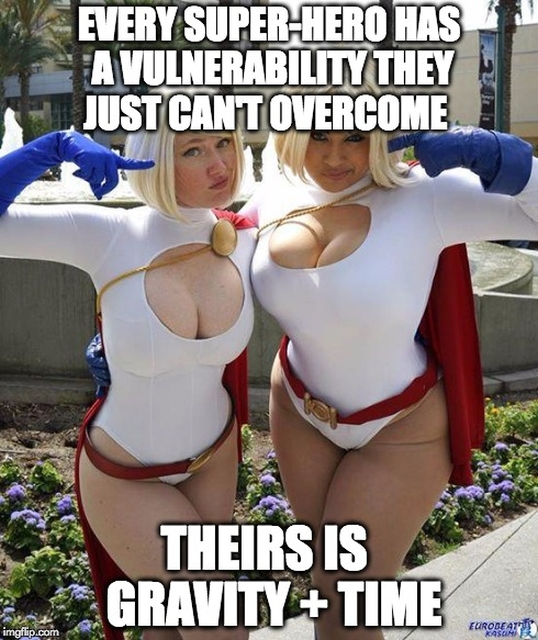

In [7]:
i = 14
image_path = test_dataset[i]['input']['image']
image = Image.open(image_path)
image_np = np.array(image)
classification = uio.image_classification(image_np, answer_options=["misogynous", "not misogynous"])
ste_ans = uio.vqa(image_np, "Is this meme example of stereotype against women ?")
sham_ans = uio.vqa(image_np, "Is this meme example of shaming against women ?")
obj_ans = uio.vqa(image_np, "Is this meme example of objectification of women ?")
vio_ans = uio.vqa(image_np, "Is this meme example of violence against women ?")
caption = uio.caption(image_np)
print(classification)
print(f'shaming: {sham_ans["text"]} | ste: {ste_ans["text"]} | obj: {obj_ans["text"]} | vio: {vio_ans["text"]}')
print(caption)
print(test_dataset[i]['output'])
display(image)

{'text': 'misogynous', 'score': array([30.949196], dtype=float32)}
shaming: unanswerable | ste: male | obj: woman | vio: yes
{'text': "person - i'm a sailor, i'm a mermaid, i'm a <extra_id_-8634>", 'score': array([-29.122427], dtype=float32)}
{'misogynous': '1', 'shaming': '1', 'stereotype': '0', 'objectification': '1', 'violence': '0'}


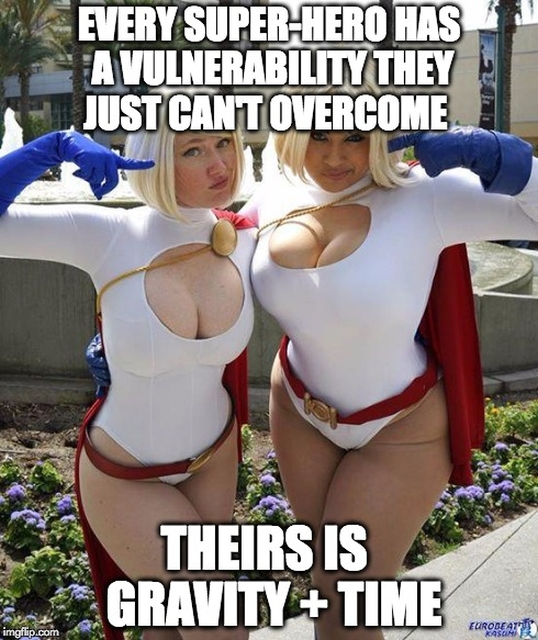

In [8]:
i = 14
image_path = test_dataset[i]['input']['image']
image = Image.open(image_path)
image_np = np.array(image)
classification = uio_large.image_classification(image_np, answer_options=["misogynous", "not misogynous"])
ste_ans = uio_large.vqa(image_np, "Is this meme example of stereotype against women ?")
sham_ans = uio_large.vqa(image_np, "Is this meme example of shaming against women ?")
obj_ans = uio_large.vqa(image_np, "Is this meme example of objectification of women ?")
vio_ans = uio_large.vqa(image_np, "Is this meme example of violence against women ?")
caption = uio_large.caption(image_np)
print(classification)
print(f'shaming: {sham_ans["text"]} | ste: {ste_ans["text"]} | obj: {obj_ans["text"]} | vio: {vio_ans["text"]}')
print(caption)
print(test_dataset[i]['output'])
display(image)